In [63]:
from typing import List, Dict, NamedTuple, Optional
from collections import Counter, namedtuple, defaultdict
import math
import matplotlib.pyplot as plt
import random
from scratch.probability import inverse_normal_cdf
from scratch.statistics import correlation
from scratch.linear_algebra import Vector, Matrix, make_matrix
from datetime import datetime
from dataclasses import dataclass
from dateutil.parser import parse
import re
import csv

In [2]:
def bucketize(point: float, bucket_size: float) -> float:
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = "") -> None:
    histogram = make_histogram(points, bucket_size)

    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [9]:
uniform = [200 * random.random() - 100 for _ in range(10000)]

normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

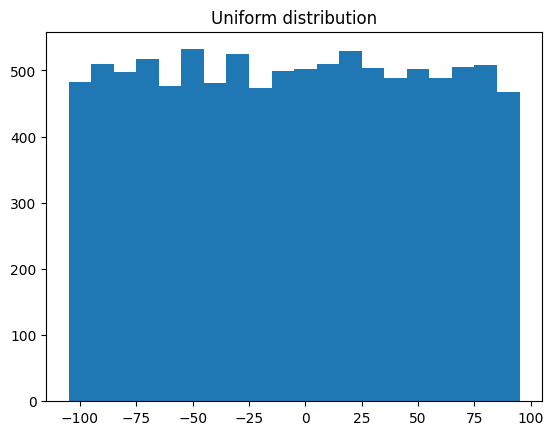

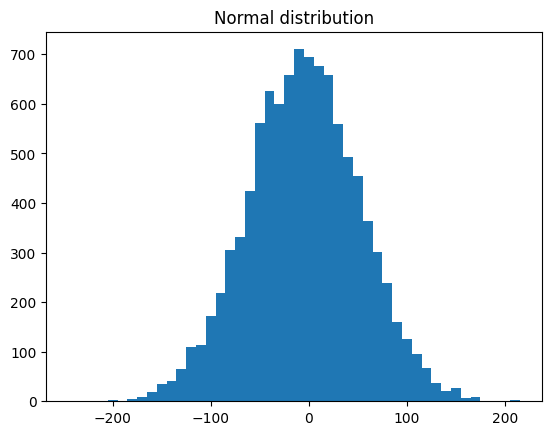

In [10]:
plot_histogram(uniform, 10, "Uniform distribution")

plot_histogram(normal, 10, "Normal distribution")

In [11]:
def random_normal():
    return inverse_normal_cdf(random.random())

In [12]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

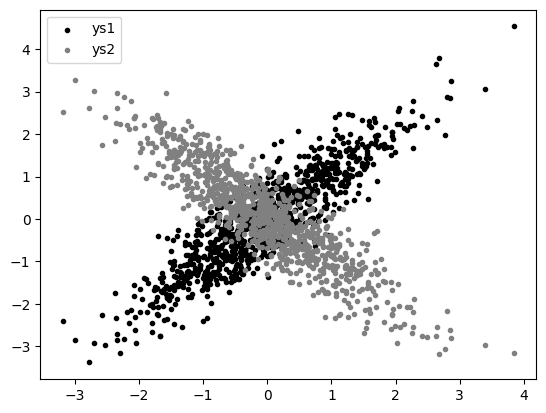

In [24]:
plt.scatter(xs, ys1, marker=".", color="black", label="ys1")
plt.scatter(xs, ys2, marker=".", color="gray", label="ys2")
plt.legend()
plt.show()

In [25]:
print(correlation(xs, ys1))

print(correlation(xs, ys2))

0.8940097865430917
-0.8917676809594121


In [36]:
def correlation_matrix(data: List[Vector]) -> Matrix:
    correlation_ij = lambda i, j: round(correlation(data[i], data[j]), 3) if i!=j else 1.

    return make_matrix(len(data), len(data), correlation_ij)

In [30]:
num_points = 100

def random_row() -> List[float]:
    row = [0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0

    return row

In [37]:
corr_rows = [random_row() for _ in range(num_points)]
corr_data = [list(col) for col in zip(*corr_rows)]

In [38]:
corr_matrix = correlation_matrix(corr_data)
for m in corr_matrix:
    print(m)

[1.0, -0.983, -0.606, -0.532]
[-0.983, 1.0, 0.61, 0.518]
[-0.606, 0.61, 1.0, 0.815]
[-0.532, 0.518, 0.815, 1.0]


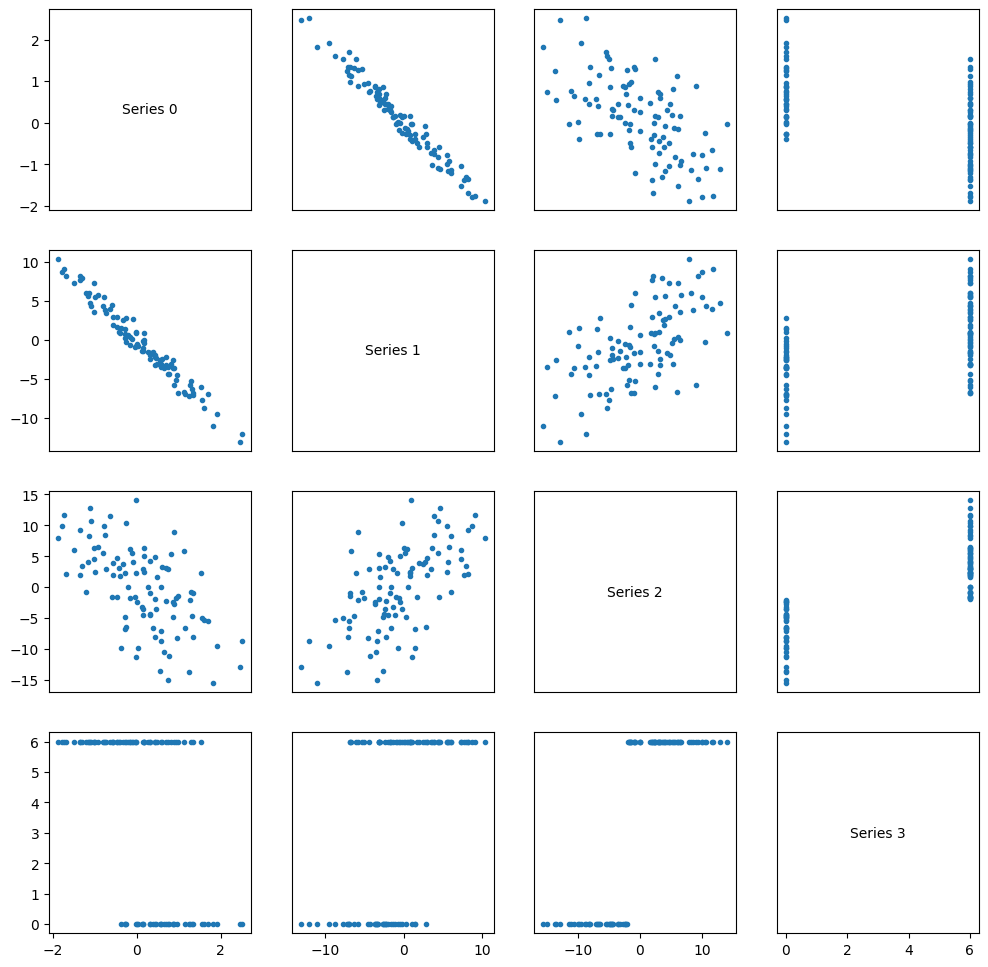

In [42]:
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors, figsize=(12, 12))

for i in range(num_vectors):
    for j in range(num_vectors):
        if i!=j: ax[i][j].scatter(corr_data[j], corr_data[i], marker='.')
        
        else: ax[i][j].annotate(f"Series {i}", (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')

        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

In [47]:
StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime(2018, 12, 14), 106.03)

print(price.symbol)
print(price.date)
print(price.closing_price)

MSFT
2018-12-14 00:00:00
106.03


In [48]:
class StockPrice(NamedTuple):
    symbol: str
    date: datetime
    closing_price: float

    def is_high_tech(self) -> bool:
        return self.symbol in ["MSFT", "GOOG", "FB", "AMZ", "AAPL"]
    
price = StockPrice("MSFT", datetime(2018, 12, 14), 106.03)

print(price.symbol)
print(price.date)
print(price.closing_price)
print(price.is_high_tech())

MSFT
2018-12-14 00:00:00
106.03
True


In [52]:
@dataclass
class StockPrice2:
    symbol: str
    date: datetime
    closing_price: float

    def is_high_tech(self) -> bool:
        return self.symbol in ["MSFT", "GOOG", "FB", "AMZ", "AAPL"]
    
price2 = StockPrice2("MSFT", datetime(2018, 12, 14), 106.03)

print(price2.symbol)
print(price2.date)
print(price2.closing_price)
print(price2.is_high_tech())
print("------------------")

price2.closing_price /= 2
print(price2.closing_price)

MSFT
2018-12-14 00:00:00
106.03
True
------------------
53.015


In [54]:
def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row

    return StockPrice(symbol=symbol, date=parse(date).date(), closing_price=float(closing_price))

stock = parse_row(["MSFT", "2018-12-14", '106.03'])
print(f"{stock.symbol}\n{stock.date}\n{stock.closing_price}")

MSFT
2018-12-14
106.03


In [58]:
def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    if not re.match(r"^[A-Z]+$", symbol):
        return None
    
    try:
        date = parse(date_).date()
    except ValueError:
        return None
    
    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None
    
    return StockPrice(symbol, date, closing_price)

In [60]:
print(try_parse_row(["MSFT0", "2018-12-14", "106.03"]))
print(try_parse_row(["MSFT", "2018-12--14", "106.03"]))
print(try_parse_row(["MSFT", "2018-12-14", "x"]))
print(try_parse_row(["MSFT", "2018-12-14", "106.03"]))

None
None
None
StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)


In [62]:
data: List[StockPrice] = []

with open("data/comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid data: {row}")
        else:
            data.append(maybe_stock)

print(data)

skipping invalid data: ['MSFT', '6/19/2014', 'n/a']
[StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 20), closing_price=90.91), StockPrice(symbol='MSFT', date=datetime.date(2014, 6, 20), closing_price=41.68), StockPrice(symbol='FB', date=datetime.date(3014, 6, 20), closing_price=64.5), StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 19), closing_price=91.86), StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_price=64.34)]
